In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# A model of population growth

For a nice explanation and visuals, see [this blogpost](https://www.pathsense.eu/simple-introduction-mathematical-modelling-biology/)

There is one species/cell-type/quantity modelled, and there are two possible interactions that can happpen:
- birth (or production/division)
- death (or degradation/elimination)

Therefore there are two parameters that describe the dynamics completely:
- rate of birth
- rate of death

In [3]:
def model_growth_birthDeath(pop, params):
    dX = params[0]*pop - params[1]*pop # change comes from birth and death
    return(dX)

We could simplify the equation for dX as  
*dX = (params0 - params1)*pop*

Which highlights that what is actually important is not birth and death rate separately, but their difference that tells us by how much the population grows (or shrinks, if it is a negative number) once accounting for birth and death both.

So we can write a simpler model with just one parameter that stands for the **net birth rate**:

In [4]:
def model_growth(pop, params):
    dX = params[0]*pop # overall change is net birth rate, a combination of birth and death
    return(dX)

## Simulating the model numerically

We will use numerical simulation to estimate how the population types changes over time. We will use the simplest method of solving differential equations, where we always take steps of **dt** time ahead and constantly update the population. (Note in this case, we could easily solve the differential equation too, but that is often not the case, so it is useful to take a more flexible approach that is applicable to more cases.)

### First, take a few simulation steps separately

We will use the values from [here](https://www.pathsense.eu/simple-introduction-mathematical-modelling-biology/), which describe how the population of Europe changes. The starting value is the population in 2015 and the net birth rate is the estimated population increase (0.35%). Since the rate is given in years, our time unit will be years too, therefore the time-step of 0.01 means 0.01 year ~ 3.5 days.

In [5]:
# Define the starting point (typically time=0) and parameters
t = 0
starting_population = 508191116

parameters = [0.0035]
dt = 0.01 # simulation parameter of how big time-steps we are taking

In [6]:
# First, take a single step of the simulation: compute the change in population in dt and update the population

delta_population = model_growth(starting_population, parameters) * dt
print('Change in population after dt:',delta_population)
population = starting_population + delta_population
print('New population size', population)

Change in population after dt: 17786.68906
New population size 508208902.68906


In [7]:
# Now, let's take two steps, note that in the second step, we use the previously updated population values
delta_population = model_growth(starting_population, parameters) * dt
next_population = starting_population + delta_population

delta_population = model_growth(next_population, parameters) * dt
population = next_population + delta_population
print('New population after two steps:', population)


New population after two steps: 508226690.0006541


In [8]:
# We can compare this to taking "two steps in one", as if dt was twice the size
delta_population = model_growth(starting_population, parameters) * 2*dt
population = starting_population + delta_population
print('New population after one larger step:', population)

New population after one larger step: 508226689.37812


The difference is basically negligible, but one can imagine that if we repeated the same experiment for 10 steps vs 10 times the step-size, it would become higher.  

Since this is a relatively simple system, we actually know what the "perfect" solution is by solving the equation of the model. At time 2dt the population will be:
*508191116 * exp(0.0035 * 2dt)*

So let's compute this to see which of the above two numbers is closest and how different they are. The original blogpost tells more about the correctness of the simulation.

In [65]:
population_t = starting_population * exp(parameters[0]*2*dt)
print(population_t)

508226690.6232172


### Now, let's run this for many steps

In [72]:
# Define the starting point (typically time=0) and parameters
t = 0
starting_population = 508191116

parameters = [0.0035]
dt = 0.01 # simulation parameter of how big time-steps we are taking
tMax = 5 # maximum time until which we want to simulate

In [73]:
time = np.arange(t, tMax, dt) # all the time-values we are evaluating, from 0 to tMax, by steps of dt
population = starting_population
pop_over_time = np.array(population) # we will store the population number at each time-step in here

for i in range(len(time)-1):
    delta_population = model_growth(population, parameters) * dt
    population = population + delta_population
    pop_over_time = np.vstack((pop_over_time, population)) # with this step, we store the updated population

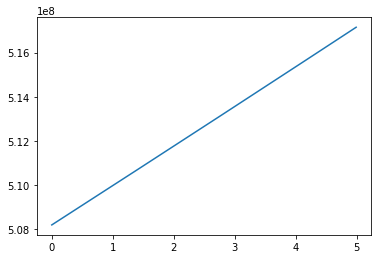

In [74]:
# Plot the population size over time: time is on the x axis and number of individual is on the y
plt.plot(time, pop_over_time)


So in this case we get a steady linear increase in the number of individuals.
- What happens if we look at a longer time-frame, does the trend stay the same?
- What if the net birth rate is different? What if it is negative? Or >1 ?